### Titanic using pandas

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Read in the titanic.csv file as a pandas dataframe called **df**



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_3_Python/data/titanic.csv')

Display the head of the dataframe

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 12)

What is the percentage of people who survived? (hint find the mean of the survival column)

In [9]:
print(df['Survived'].mean() *100,"%")

38.38383838383838 %


How many women and how many men survived?

In [10]:
df.groupby(['Survived','Sex']).count().Name

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Name, dtype: int64

What is the percentage of people that survived who paid a fare less than 10?

In [11]:
df1 = df[df['Fare']<10]
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [12]:
survived_fare_less10 = df1[df1['Survived']==1]
survived = df[df['Survived']==1]
print("Survived less than 10:",len(survived_fare_less10))
print("Total Survived:", len(survived))
print("Percent of Survived Individuals who paid less than 10USD:", (len(survived_fare_less10)/len(survived))*100,"%")


Survived less than 10: 67
Total Survived: 342
Percent of Survived Individuals who paid less than 10USD: 19.5906432748538 %


What is the average age of those who didn't survive?

In [13]:
non_survived = df[df['Survived']==0]
non_survived['Age'].mean()

30.62617924528302

What is the average age of those who did survive?

In [14]:
survived = df[df['Survived']==1]
survived['Age'].mean()

28.343689655172415

What is the average age of those who did and didn't survive grouped by gender?

In [15]:
sur_gender = df.groupby(['Survived','Sex'])
sur_gender['Age'].mean()

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64

What is the pclass survived?

In [19]:
survived['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

What is the pclass survived group by gender?

In [20]:
sur_gender['Pclass'].value_counts()

Survived  Sex     Pclass
0         female  3          72
                  2           6
                  1           3
          male    3         300
                  2          91
                  1          77
1         female  1          91
                  3          72
                  2          70
          male    3          47
                  1          45
                  2          17
Name: Pclass, dtype: int64

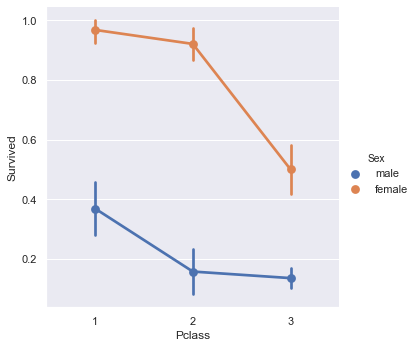

In [27]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df);

What is the Embarked survived?

In [21]:
survived['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

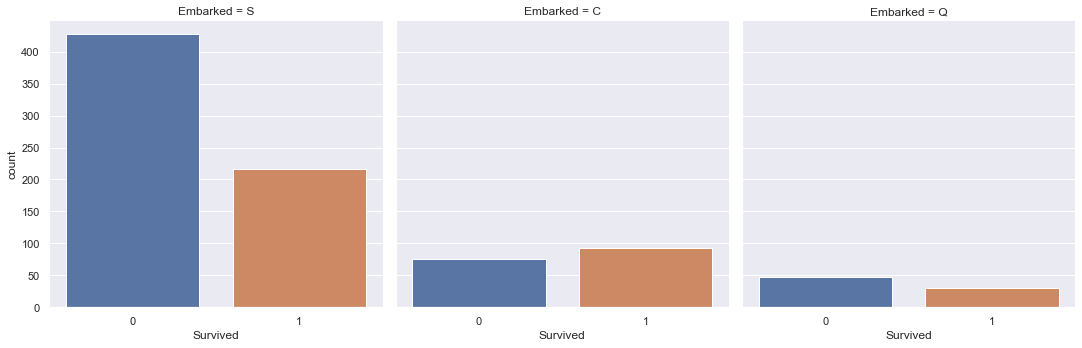

In [28]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df);

What is the Embarked survived group by gender?

In [22]:
sur_gender['Embarked'].value_counts()

Survived  Sex     Embarked
0         female  S            63
                  C             9
                  Q             9
          male    S           364
                  C            66
                  Q            38
1         female  S           140
                  C            64
                  Q            27
          male    S            77
                  C            29
                  Q             3
Name: Embarked, dtype: int64

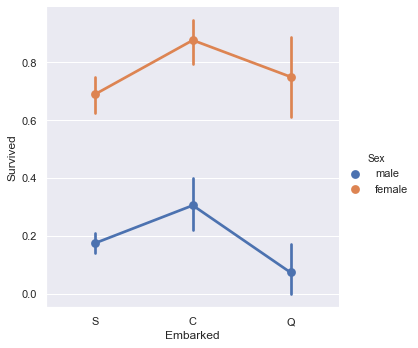

In [26]:
sns.catplot('Embarked','Survived', hue= 'Sex', kind='point', data=df);